In [10]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
import os

In [2]:
# read 1 column data
def read_file(filename):
    # Open and read the file
    with open(filename, "r") as file:
        # Read all lines from the file
        lines = file.read().splitlines()

    # Remove any empty lines that might separate the sets
    lines = [line.strip() for line in lines if line.strip() != ""]

    # Convert each line from a string to an integer
    all_values = [int(line) for line in lines]
    return all_values

In [3]:
# Define the filename (ensure it's in the same directory or provide the full path)
filename = "QHatInvModq.txt"

all_values = read_file(filename)

# Split the numbers into four sets, each with 8 numbers
QHatInvModq_modup_1 = all_values[0:8]
QHatInvModq_modup_2 = all_values[8:16]
QHatInvModq_modup_3 = all_values[16:24]
QHatInvModq_moddown = all_values[24:32]

# Now, the four variables contain the data from each set:
print("Data Set 1:", QHatInvModq_modup_1)
print("Data Set 2:", QHatInvModq_modup_2)
print("Data Set 3:", QHatInvModq_modup_3)
print("Data Set 4:", QHatInvModq_moddown)

Data Set 1: [16282250107798, 67476164661436, 17729150175817, 17566864615467, 133239631145592, 17810507564477, 52128674736110, 108120360356123]
Data Set 2: [54892234581720, 25456932827849, 36096074969099, 111769270868650, 78195284942124, 105094343189914, 88896782391640, 62549059927953]
Data Set 3: [54057398135643, 21119821720105, 133419840200304, 2388212004078, 14057265317921, 47644746083260, 1863542791889, 6924149146739]
Data Set 4: [182366074434485, 196208580486154, 139392991414073, 183648902731840, 43514157372654, 122461214896939, 263888314911084, 275894576265033]


In [4]:
# Compute bit length for each element
data_1_size = [int(x).bit_length() for x in QHatInvModq_modup_1]
print("Bit sizes:", data_1_size)
# Compute the sum
total_data_1_size = np.sum(data_1_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_1_size, " bit")

Bit sizes: [44, 46, 45, 44, 47, 45, 46, 47]
Sum: 364  bit


In [5]:
# Compute bit length for each element
data_2_size = [int(x).bit_length() for x in QHatInvModq_modup_2]
print("Bit sizes:", data_2_size)
# Compute the sum
total_data_2_size = np.sum(data_2_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_2_size, " bit")

Bit sizes: [46, 45, 46, 47, 47, 47, 47, 46]
Sum: 371  bit


In [6]:
# Compute bit length for each element
data_3_size = [int(x).bit_length() for x in QHatInvModq_modup_3]
print("Bit sizes:", data_3_size)
# Compute the sum
total_data_3_size = np.sum(data_3_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_3_size, " bit")

Bit sizes: [46, 45, 47, 42, 44, 46, 41, 43]
Sum: 354  bit


In [7]:
# Compute bit length for each element
data_4_size = [int(x).bit_length() for x in QHatInvModq_moddown]
print("Bit sizes:", data_4_size)
# Compute the sum
total_data_4_size = np.sum(data_4_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_4_size, " bit")

Bit sizes: [48, 48, 47, 48, 46, 47, 48, 48]
Sum: 380  bit


In [8]:
380+354+371+365

1470

In [11]:
ringDim = 1 << 16
L = 23
BW = 48

In [14]:
import matplotlib.pyplot as plt

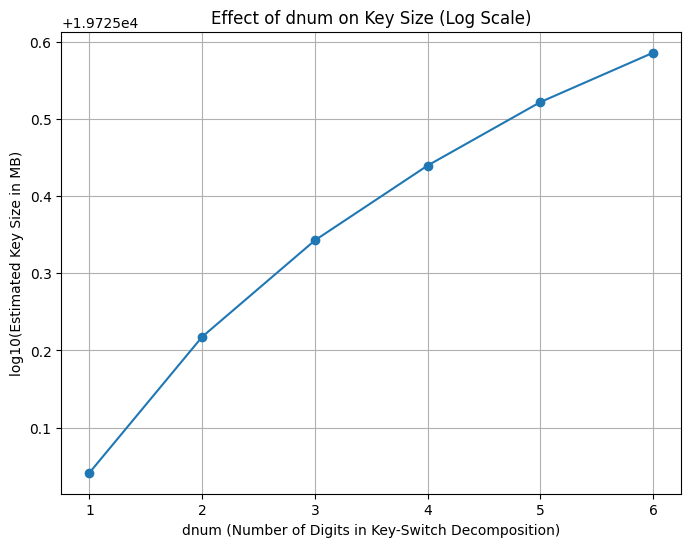

dnum = 1: Key Size = 1.1005718611854015005378205056178162691668963183671730208364961403441190512699464769168429674028564534246425847830911479880619228783611641857803684865023146522513047392118630549131546005240709443260961E+19725 MB, log10 = 19725.041618404815197669189915944742330523737670888657235471487839250993235944410032848533349999089597052749243922478183320834507045915177614814421776411206528196229709766966471922732201973439017682929
dnum = 2: Key Size = 1.6508577917781022508067307584267244037503444775507595312547442105161785769049197153752644511042846801369638771746367219820928843175417462786705527297534719783769571088177945823697319007861064164891442E+19725 MB, log10 = 19725.217709663870878911271204953272952806169609871385822795007277430171356907919269462089391102619027182219024138055004371348975247176269318659712427783573362031098449754565449877560167443422891538606
dnum = 3: Key Size = 2.20114372237080300107564101123563253833379263673434604167299228068823810253989295383368593

In [27]:
import math
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

# Set precision high enough to handle large numbers
getcontext().prec = 200

# Design parameters (adjust as needed)
ringdim = 2**16       # The polynomial has 2^ringdim coefficients
L = 23             # Parameter L
limb_width = 48    # Bit-width per limb

# Define a range of dnum values to examine
dnum_values = range(1, 7)

key_size_MB = []  # List to store key sizes in MB

for dnum in dnum_values:
    # Compute alpha = ceil((L+1) / dnum)
    alpha = math.ceil((L + 1) / dnum)
    # Compute key size in bits using the formula:
    # key_size = 2 * 2^ringdim * dnum * (alpha + L + 1) * limb_width
    key_bits = 2 * (2 ** ringdim) * dnum * (alpha + L + 1) * limb_width
    # Convert bits to MB: divide by 8 (bits per byte) and then by 1024^2 (bytes per MB)
    key_mb = Decimal(key_bits) / Decimal(8 * 1024**2)
    key_size_MB.append(key_mb)

# Compute the base-10 logarithm of each key size using Decimal (to avoid overflow converting to float)
key_size_MB_log = []
for val in key_size_MB:
    # Ensure we have a positive value
    if val <= 0:
        key_size_MB_log.append(Decimal('-Infinity'))
    else:
        log_val = val.ln() / Decimal(10).ln()  # log10(val)
        key_size_MB_log.append(log_val)

# Convert the Decimal logarithm values to float for plotting
key_size_MB_log_float = [float(x) for x in key_size_MB_log]

# Plotting the result (log10 scale)
plt.figure(figsize=(8, 6))
plt.plot(list(dnum_values), key_size_MB_log_float, marker='o', linestyle='-')
plt.xlabel("dnum (Number of Digits in Key-Switch Decomposition)")
plt.ylabel("log10(Estimated Key Size in MB)")
plt.title("Effect of dnum on Key Size (Log Scale)")
plt.grid(True)
plt.show()

# Optionally, print the key sizes and their log10 values
for dnum, size, log_val in zip(dnum_values, key_size_MB, key_size_MB_log):
    print(f"dnum = {dnum}: Key Size = {size} MB, log10 = {log_val}")


In [33]:
# Define the filename (ensure it's in the same directory or provide the full path)
filename = "QHatModp_modup_1.txt"

# Read the entire file content
with open(filename, 'r') as f:
    content = f.read()

# Split the content into individual number strings (splitting on whitespace)
number_strings = content.split()

# Convert each string into an integer
numbers = [int(num_str) for num_str in number_strings]

# Create a DataFrame with a single column named 'number'
df = pd.DataFrame({'number': numbers})

# Display the DataFrame
print(df)

# Compute bit length for each element
data_size = [int(x).bit_length() for x in numbers]
print("Bit sizes:", data_size)
# Compute the sum
total_data_size = np.sum(data_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_size, " bit")


              number
0    121944940840761
1     54832415687253
2     64686702520855
3     85730910196445
4    135133973373357
..               ...
187  255021959640084
188   53051077092036
189  188526700737963
190   37552726940865
191  225922708730252

[192 rows x 1 columns]
Bit sizes: [47, 46, 46, 47, 47, 45, 46, 47, 46, 46, 45, 43, 47, 45, 47, 46, 47, 44, 48, 48, 46, 48, 48, 45, 47, 44, 43, 47, 47, 47, 47, 44, 46, 47, 46, 46, 46, 47, 45, 46, 47, 48, 48, 44, 48, 48, 47, 46, 47, 47, 46, 47, 45, 47, 47, 47, 47, 47, 44, 47, 42, 46, 47, 47, 47, 46, 48, 48, 48, 48, 48, 48, 45, 44, 47, 47, 43, 45, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 42, 48, 48, 47, 46, 47, 48, 40, 46, 47, 47, 47, 45, 47, 47, 47, 47, 44, 45, 46, 42, 47, 47, 45, 47, 48, 47, 46, 48, 45, 48, 46, 47, 46, 47, 46, 47, 44, 44, 47, 46, 44, 44, 46, 44, 46, 47, 47, 47, 48, 48, 46, 46, 48, 47, 47, 46, 42, 46, 44, 46, 47, 46, 45, 46, 46, 46, 47, 47, 47, 44, 47, 45, 47, 47, 47, 48, 47, 47, 48, 47, 47, 47, 44, 47, 37, 47, 46, 47, 45, 

In [34]:
# Define the filename (ensure it's in the same directory or provide the full path)
filename = "QHatModp_modup_2.txt"

# Read the entire file content
with open(filename, 'r') as f:
    content = f.read()

# Split the content into individual number strings (splitting on whitespace)
number_strings = content.split()

# Convert each string into an integer
numbers = [int(num_str) for num_str in number_strings]

# Create a DataFrame with a single column named 'number'
df = pd.DataFrame({'number': numbers})

# Display the DataFrame
print(df)

# Compute bit length for each element
data_size = [int(x).bit_length() for x in numbers]
print("Bit sizes:", data_size)
# Compute the sum
total_data_size = np.sum(data_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_size, " bit") 


              number
0    191722748951756
1    127436621855015
2    115696298653304
3    103531618026278
4    137946129893788
..               ...
187  118761899202953
188  175838510484549
189  262085370425414
190   89967825373967
191   56403866026794

[192 rows x 1 columns]
Bit sizes: [48, 47, 47, 47, 47, 47, 47, 46, 47, 47, 47, 46, 46, 47, 45, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 47, 46, 47, 46, 46, 47, 41, 47, 44, 47, 46, 47, 47, 47, 47, 48, 48, 45, 48, 48, 45, 45, 47, 48, 44, 47, 47, 46, 47, 46, 47, 47, 45, 46, 47, 47, 46, 47, 45, 48, 47, 46, 48, 47, 48, 47, 45, 48, 42, 47, 47, 47, 44, 47, 39, 46, 47, 47, 46, 47, 47, 45, 47, 46, 48, 48, 47, 48, 48, 48, 48, 48, 46, 47, 47, 47, 45, 46, 44, 46, 42, 47, 46, 47, 43, 47, 46, 48, 48, 48, 48, 48, 48, 48, 47, 48, 46, 45, 42, 45, 47, 46, 46, 46, 44, 47, 47, 47, 47, 44, 44, 48, 48, 47, 45, 48, 45, 48, 48, 46, 47, 46, 45, 44, 47, 47, 47, 43, 46, 42, 47, 47, 46, 47, 47, 46, 47, 47, 46, 48, 45, 46, 46, 48, 42, 47, 46, 47, 47, 47, 47, 46, 47, 

In [35]:
# Define the filename (ensure it's in the same directory or provide the full path)
filename = "QHatModp_modup_3.txt"

# Read the entire file content
with open(filename, 'r') as f:
    content = f.read()

# Split the content into individual number strings (splitting on whitespace)
number_strings = content.split()

# Convert each string into an integer
numbers = [int(num_str) for num_str in number_strings]

# Create a DataFrame with a single column named 'number'
df = pd.DataFrame({'number': numbers})

# Display the DataFrame
print(df)

# Compute bit length for each element
data_size = [int(x).bit_length() for x in numbers]
print("Bit sizes:", data_size)
# Compute the sum
total_data_size = np.sum(data_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_size, " bit") 


              number
0    250935752825953
1     19310771405629
2     77476670937729
3     83262669865981
4    119101063176238
..               ...
187  147238380769342
188  126829843899624
189  269085481996446
190   52265568577885
191  184122070620992

[192 rows x 1 columns]
Bit sizes: [48, 45, 47, 47, 47, 45, 46, 47, 47, 47, 47, 47, 46, 44, 45, 46, 48, 48, 48, 48, 46, 47, 46, 48, 48, 47, 46, 47, 47, 47, 47, 47, 47, 43, 44, 47, 46, 47, 46, 46, 47, 46, 47, 48, 44, 48, 48, 47, 46, 43, 47, 47, 42, 47, 44, 46, 46, 46, 47, 47, 44, 47, 46, 47, 48, 43, 47, 47, 48, 42, 48, 44, 48, 47, 46, 47, 47, 44, 47, 45, 43, 45, 47, 46, 47, 45, 47, 45, 47, 47, 47, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 46, 46, 46, 46, 43, 47, 47, 42, 45, 46, 47, 45, 48, 48, 48, 48, 47, 47, 48, 46, 47, 44, 47, 44, 47, 47, 45, 47, 44, 47, 47, 47, 47, 42, 46, 47, 48, 48, 47, 48, 47, 47, 48, 48, 47, 46, 47, 43, 46, 47, 47, 45, 45, 47, 47, 46, 43, 45, 47, 48, 47, 46, 48, 47, 46, 48, 48, 48, 47, 43, 47, 47, 46, 46, 46, 45, 47, 

In [36]:
# Define the filename (ensure it's in the same directory or provide the full path)
filename = "QHatModp_moddown.txt"

# Read the entire file content
with open(filename, 'r') as f:
    content = f.read()

# Split the content into individual number strings (splitting on whitespace)
number_strings = content.split()

# Convert each string into an integer
numbers = [int(num_str) for num_str in number_strings]

# Create a DataFrame with a single column named 'number'
df = pd.DataFrame({'number': numbers})

# Display the DataFrame
print(df)

# Compute bit length for each element
data_size = [int(x).bit_length() for x in numbers]
print("Bit sizes:", data_size)
# Compute the sum
total_data_size = np.sum(data_size, dtype=object)  # Ensure correct precision
print("Sum:", total_data_size, " bit")


              number
0     61831282598065
1    137321241154093
2     58786896040807
3     46582060605996
4    114820307907138
..               ...
187   85635282875385
188   14171509666185
189   93255321865794
190   89813737606102
191   17483999358461

[192 rows x 1 columns]
Bit sizes: [46, 47, 46, 46, 47, 46, 43, 47, 46, 45, 47, 47, 47, 46, 45, 47, 47, 43, 47, 43, 47, 47, 47, 47, 48, 46, 44, 40, 45, 47, 47, 42, 47, 43, 47, 45, 42, 46, 43, 46, 47, 47, 47, 44, 47, 47, 46, 41, 48, 46, 47, 42, 46, 46, 47, 45, 46, 46, 46, 44, 47, 47, 46, 46, 47, 45, 46, 47, 47, 47, 42, 47, 48, 47, 47, 47, 47, 47, 47, 44, 46, 47, 44, 46, 47, 44, 46, 47, 47, 47, 43, 44, 47, 43, 45, 47, 48, 47, 42, 46, 46, 44, 45, 46, 47, 47, 47, 46, 44, 47, 45, 47, 47, 47, 47, 45, 45, 47, 43, 43, 47, 47, 47, 47, 47, 44, 43, 44, 47, 47, 47, 46, 46, 47, 47, 47, 47, 46, 43, 47, 47, 46, 44, 46, 48, 45, 46, 47, 46, 46, 41, 46, 47, 46, 44, 46, 46, 46, 44, 46, 47, 46, 45, 46, 47, 47, 46, 47, 48, 47, 45, 47, 46, 47, 46, 44, 44, 43, 

In [37]:
8883 +8922 +8910 +8801

35516

### Data preparation for INTT in ModDown 1 (last mod down)

In [3]:
# Read the CSV file into a DataFrame.
cTilda1_partp_df = pd.read_csv("cTilda1_partp.csv")
cTilda1_partp_df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,237745947156830,275150242979646,1392974976033,234620547812065,182622770290827,89218932879203,243625467199261,246166918506735,38610904703355,193126863922351,...,146714849881282,115267750392655,275764296742863,57385823970886,177540102449741,180855975403442,147116927459715,67580948975837,143111037008377,144517615155269
1,37777573222383,181715542047220,67881679026511,254468427375057,159636254910547,4236058416582,148170514617123,18708259864939,305996415530,280070543397649,...,265336344426934,35205562371678,152422886188202,21927466323611,146197273449077,149597294082033,65411692176739,24837887189901,7797580721333,154238865044892
2,22304588985657,231095019276312,260425527567743,244293647963441,124647321919664,61779731327009,191274181968972,194681176771521,273281611098750,113859141840184,...,274110888545978,91686372802479,46244616602840,132637359968057,13633881705072,76187446632654,215589933883251,125441370496323,261167905220419,37711053837176
3,277423387666895,204934588549861,12199376431550,168709054086718,108953634825994,205261907244623,245003803058979,151898544756062,163449391670169,227253337101781,...,245745456878247,113962370357789,146978646463988,78773336761069,195697039524580,45455028619770,157368752628444,27542366996459,107340800541308,22110490063396
4,234763868390907,16236637233591,249315410371760,35769615491779,238236907119277,220718227247923,19586204918248,238709601924940,143166302498630,48520722994440,...,96997973374230,261064940810920,229580654355595,19401949826761,64928665200780,101600409167498,193084791854310,112383083714975,114770709627688,13753091955830
5,248845216955401,218217641800008,85725373526200,169133292497544,206957322412482,270603823298200,10458373661356,139722344101966,211213444214868,226715059505008,...,126620268395914,158642572398231,144056198105682,234594219780634,158328889391948,67044718136628,81061036001957,142413044799419,262844833555235,77574266675144
6,27073938962786,271794443198340,157758917572221,49128812238393,101698885067817,50083511887785,107661662537167,182699944744105,54512319644052,10677866866052,...,184457691313317,181669182866393,135709944745364,64720557750445,114319856929039,270265996869512,276079590926504,207031568017259,119659720113377,121561349230112
7,169430806996559,16211388907776,58055099259542,248978040093913,197472416473712,269972268092545,150897455346935,129879559734400,281302273857275,164436517914306,...,275961992553673,126205236112428,237131763039059,227618266161675,87797358314862,105821829138262,32586711923128,168906576188451,136440139190432,183170807613822


Store limb in interleave manner

In [4]:
# Convert each value in the DataFrame to a hexadecimal string.
cTilda1_partp_df_hex = cTilda1_partp_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
cTilda1_partp_df_hex

DataFrame with hex values:


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,D83A8ABA215E,FA3F687E1F3E,014453C75421,D562DA68CAE1,A6182D59E08B,5124E6CD2F63,DD93796E3F1D,DFE333BBA8EF,231DCD42617B,AFA5DA1EE4AF,...,856FB682ACC2,68D5DD50F34F,FACE60F2F7CF,34312DA72646,A178C6BD6A4D,A47CD02B5FB2,85CD5433A183,3D76EA7510DD,8228A28639F9,8370211D7845
1,225BC6D517EF,A544F25579F4,3DBCEF5D794F,E7700C3861D1,913036446853,03DA48C1D5C6,86C2A2E3D323,1103DB2F016B,00473ECEC22A,FEB901405311,...,F1526E8E39B6,2004EF0A0E5E,8AA0B7FCA4AA,13F162D74E9B,84F7348D1275,880ED592B7F1,3B7DD8AD2563,16970571638D,071784076CB5,8C4788C2F59C
2,1449311A7539,D22E00888818,ECDB0B0FA57F,DE2F0C1B9531,715DB75860B0,383036F0A821,ADF67DABC44C,B10FBE62CBC1,F88C555A6A7E,678DE5B42D38,...,F94D6A240EBA,536365AE7FAF,2A0F29F204D8,78A20AB98F39,0C6662AD0A70,454AC5B160CE,C413F16D1F73,721698541D43,ED87E437A743,224C49F7D378
3,FC50AA7969CF,BA630D5A4AE5,0B18637FA9BE,9970A33D3E3E,6317BEB3670A,BAAF4311364F,DED464A66323,8A26A2CD555E,94A806EDE399,CEAF8A6E95D5,...,DF8112A992A7,67A5EE9A5A1D,85AD220315F4,47A4D8C162ED,B1FC448642E4,295752D589FA,8F20449962DC,190CB50047EB,61A03A49427C,141BFFE7F224
4,D58438FB45FB,0EC462FEA1B7,E2C04478E4B0,20884339A2C3,D8ACDA38A2AD,C8BDF787D333,11D044C961E8,D91AE906F74C,8235809AAF46,2C211C755508,...,583819BF3516,ED6FEB0F72A8,D0CD6959A48B,11A55E53CEC9,3B0D6206688C,5C67B04C268A,AF9C0E6E14E6,663639C8999F,68622360C328,0C8224291C76
5,E252CAC2BC09,C677C105F148,4DF77E6FF0B8,99D369D1AA88,BC3A01AFA1C2,F61CDCC33698,098307A5A2AC,7F13A4AFF84E,C018F6507054,CE3236964770,...,7329141E7D8A,9048DA2C8E97,8304B2840A52,D55CB922EA1A,8FFFD135BB4C,3CFA109BCD34,49B97E418AA5,81861EF257BB,EF0E54EF6323,468DAA9BDFC8
6,189FA483B962,F732133D1F84,8F7B1C3DF67D,2CAEB166D639,5C7E9DEB2429,2D8CF9EF67A9,61EAEF26C5CF,A62A254E94A9,31942372C194,09B622762584,...,A7C3672AB4A5,A53A271C83D9,7B6D6F0C8D94,3ADCEDDAB8AD,67F92A76890F,F5CE34BCFF88,FB17C9F268A8,BC4B4B11A76B,6CD4731C7CE1,6E8F350A0E20
7,9A18AF10A64F,0EBE8213C100,34CD01919A96,E271B7A2FCD9,B399A13CA270,F589D1238C81,893D8D3934F7,761FF1058480,FFD7CA1B96FB,958DDC3D06C2,...,FAFC6889A4C9,72C872446C2C,D7AB8A803B53,CF0481E6220B,4FD9EA5AC56E,603E90890756,1DA32F6379B8,999EA0795423,7C17720790A0,A697C6EBC97E


In [11]:
# DataFrame has 65536 column and 8 rows with each data holding 48-bit integer data
# Get the limbs as a list of Series (one per row)
limbs = [row for _, row in cTilda1_partp_df_hex.iterrows()]

# Folder where the 171 files already exist.
folder = "memory"

# Parameters
group_size = 256              # Number of values per group.
num_groups = 65536 // group_size  # Should be 256 groups per limb.
chunk_size = 18               # Each full chunk is 18 hex digits (72 bits).
num_full_chunks = 170         # Files file0.mem to file169.mem get full chunks.
# The remaining 12 hex digits (48 bits) go to file170.mem.

# Process each limb (each row in the DataFrame)
for limb in limbs:
    # Process each group (256 consecutive values) in this limb
    for group_index in range(num_groups):
        # Extract the group of 256 values (as a Series)
        group_data = limb.iloc[group_index * group_size : (group_index + 1) * group_size].values
        # print(group_data)
        
        # Concatenate the 256 hex strings into one long hex string (3072 hex digits)
        group_long = ''.join(group_data)
        # print(group_long)
        
        # For each full chunk of 18 hex digits, append to its corresponding file
        for file_index in range(num_full_chunks):
            chunk = group_long[file_index * chunk_size : (file_index + 1) * chunk_size]
            file_path = os.path.join(folder, f"cTilda1_partp_file{file_index}.mem")
            with open(file_path, "a") as f:
                f.write(chunk + "\n")
        
        # Append the remaining 12 hex digits to file170.mem
        remainder_chunk = group_long[num_full_chunks * chunk_size:]
        file_path = os.path.join(folder, f"cTilda1_partp_file{num_full_chunks}.mem")  # This is file170.mem.
        with open(file_path, "a") as f:
            f.write(remainder_chunk + "\n")

print("Data from all 16 limbs has been successfully appended to the existing files in the 'memory' folder.")

Data from all 16 limbs has been successfully appended to the existing files in the 'memory' folder.


we want to switch from 256→32 coefficients per group, so each group_long is 32 × 12 = 384 hex digits, which splits into 21 full 18‑digit chunks plus one 6‑digit remainder (22 files) per limb, and with 8 limbs in total you’ll end up with 8 × 22 = 176 files.

In [12]:
# DataFrame has 65536 column and 8 rows with each data holding 48-bit integer data
# Get the limbs as a list of Series (one per row)
limbs = [row for _, row in cTilda1_partp_df_hex.iterrows()]

# Folder where the 171 files already exist.
folder = "memory"
# os.makedirs(folder, exist_ok=True)

# New parameters
group_size       = 32                        # 32 coeffs per group
num_groups       = 65536 // group_size       # 2048 groups per limb
hex_per_value    = 12                        # each value is a 48‑bit hex string
chunk_size       = 18                        # 18 hex digits per chunk
group_long_len   = hex_per_value * group_size  # 384 hex digits
num_full_chunks  = group_long_len // chunk_size  # 21 full chunks
has_remainder    = (group_long_len % chunk_size) > 0  # True
num_files_per_limb = num_full_chunks + (1 if has_remainder else 0)  # 22

# # (Optional) Clear out old files
# for limb_idx in range(len(limbs)):
#     for file_idx in range(num_files_per_limb):
#         p = os.path.join(folder, f"cTilda1_partp_limb{limb_idx}_file{file_idx}.mem")
#         open(p, "w").close()

# Now write
for limb_idx, limb in enumerate(limbs):
    for group_idx in range(num_groups):
        # slice out 32 values, concatenate
        vals = limb.iloc[group_idx*group_size : (group_idx+1)*group_size].values
        group_long = "".join(vals)

        # write full chunks
        for file_idx in range(num_full_chunks):
            chunk = group_long[file_idx*chunk_size : (file_idx+1)*chunk_size]
            # global file index = limb_index * 22 + chunk_index
            path  = os.path.join(folder, f"cTilda1_partp_limb{limb_idx}_file{file_idx}.mem")
            with open(path, "a") as f:
                f.write(chunk + "\n")

        # write remainder chunk (if any)
        if has_remainder:
            rem = group_long[num_full_chunks*chunk_size :]
            path = os.path.join(folder, f"cTilda1_partp_limb{limb_idx}_file{num_full_chunks}.mem")
            with open(path, "a") as f:
                f.write(rem + "\n")

print(f"Done: created {len(limbs)*num_files_per_limb} files ({num_files_per_limb} per limb).")

print("Data from all 8 limbs has been successfully appended to the existing files in the 'memory' folder.")

Done: created 176 files (22 per limb).
Data from all 8 limbs has been successfully appended to the existing files in the 'memory' folder.


In [13]:
# Assume cTilda1_partp_df_hex is your DataFrame (8 rows × 65536 cols)
limbs = [row for _, row in cTilda1_partp_df_hex.iterrows()]

folder = "memory"
os.makedirs(folder, exist_ok=True)

# Parameters
num_limbs         = len(limbs)                # 8
group_size        = 32                        # coeffs per group
num_groups        = 65536 // group_size       # 2048 groups per limb
hex_per_value     = 12                        # each value is 12‑hex digits
chunk_size        = 18                        # hex digits per chunk
group_long_len    = hex_per_value * group_size  # 384 hex digits
num_full_chunks   = group_long_len // chunk_size  # 21 full chunks
has_remainder     = (group_long_len % chunk_size) > 0  # True (6‑digit remainder)
files_per_limb    = num_full_chunks + (1 if has_remainder else 0)  # 22
total_files       = num_limbs * files_per_limb  # 176

# (Optional) Clear out old files so we start fresh
for file_index in range(total_files):
    path = os.path.join(folder, f"cTilda1_partp_file{file_index}.mem")
    open(path, "w").close()

# Now append each chunk to the correct file
for limb_idx, limb in enumerate(limbs):
    for group_idx in range(num_groups):
        # 1) Grab 32 hex‑strings and concat
        vals = limb.iloc[group_idx*group_size : (group_idx+1)*group_size].values
        group_long = "".join(vals)

        # 2) Write the 21 full 18‑digit chunks
        for chunk_idx in range(num_full_chunks):
            chunk = group_long[chunk_idx*chunk_size : (chunk_idx+1)*chunk_size]
            # global file index = limb_index * 22 + chunk_index
            file_index = limb_idx * files_per_limb + chunk_idx
            file_path  = os.path.join(folder, f"cTilda1_partp_file{file_index}.mem")
            with open(file_path, "a") as f:
                f.write(chunk + "\n")

        # 3) Write the final 6‑digit remainder
        if has_remainder:
            rem = group_long[num_full_chunks*chunk_size :]
            file_index = limb_idx * files_per_limb + num_full_chunks
            file_path  = os.path.join(folder, f"cTilda1_partp_file{file_index}.mem")
            with open(file_path, "a") as f:
                f.write(rem + "\n")

print(f"Done: appended data into {total_files} files ({files_per_limb} per limb).")


Done: appended data into 176 files (22 per limb).


PSI Inverse partp

In [14]:
# Read the CSV file into a DataFrame.
psi_inv_partp_df = pd.read_csv("psi_inv_partp_df.csv")
psi_inv_partp_df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,1,243643543261423,149659600174964,245896825321736,177284709727666,121878337634549,269868119893769,140363366025035,98643545633588,31914299785149,...,46307028202501,73392564067417,18346937209176,28881172047477,40457915477763,256613953290253,205470469936153,75801365315666,239931782030356,281466578399042
1,1,92211030601241,66737408918590,190251275358597,108683575142829,2733784828574,113274465142183,227682238357794,59646034530002,132487797730421,...,99215475880754,65993083397921,109428104011175,201863142716178,32780778949568,45989614694831,103241280350299,198758933922009,41166795179310,281473071776477
2,1,103753321931534,202551314639618,137424755700187,250444239060403,147508042772740,251083659291608,7799013102715,276779254146104,87457232462867,...,134697692078765,172796562264840,224679606781753,82386743130548,110814407927761,261302279264229,226802338091899,64702178911174,54726017243571,281468376726595
3,1,4964347495996,221615821582452,233830360085768,190981785412949,167525987924622,139632283754325,21804340891366,103561619732260,122261716948595,...,65666218913817,174065816681508,168450486893449,106340366144515,199617248419829,138405717452314,46701620338636,57766712474689,279916724457098,281470320477731
4,1,109228461484936,200619268918640,124012496457740,77369316815990,235691664806988,81136083048053,93447459399149,140882805962809,166475966984996,...,254628941713235,181529784830672,174089778776989,146099419435713,205860376611448,203936973712486,194472001222188,242463533022113,122849288195947,281470812465446
5,1,176831253807184,105118224157878,66978025588977,106934760662570,215793391026325,112212204801378,75526120085296,18912074745383,1546158795492,...,132539490583723,33814509762756,183682204181250,125225312445546,95572812890786,135604493602402,170842361112475,256901461284298,184909338086825,281473198744416
6,1,135684147337051,109895127345884,205400637807260,90536167848037,36509308135160,128648947792694,83220172201938,278757922881673,90314038050569,...,153492160728613,88882756480563,217756876718590,48829076434863,47391534697630,40051754508390,263807578276266,117656912085274,60536168143269,281470522043154
7,1,152309822087658,175230962427080,70555523443122,247825999638559,66730890744785,132575234512919,162575541910577,113241581200941,63130277129402,...,91823257821895,97785846148823,212599566086237,249641689923699,95437507737008,33286862979241,133719546181994,131244781178381,224824085829239,281472441803711


In [16]:
# Convert each value in the DataFrame to a hexadecimal string.
psi_inv_partp_df_hex = psi_inv_partp_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
psi_inv_partp_df_hex

DataFrame with hex values:


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,000000000001,DD97AED910EF,881D574E3F74,DFA450ECB908,A13D5025BDB2,6ED9030540F5,F571916C2709,7FA8E492474B,59B73D7F3334,1D06A0807FBD,...,2A1DB1F77405,42C009B5DC59,10AFBAACD158,1A446C002675,24CBD7AE2F03,E9639787C00D,BADFD25F5419,44F0E1740052,DA3778A36414,FFFE0B6BEF42
1,000000000001,53DD8DB92E19,3CB2838D443E,AD0853AF9185,62D8DDE3A9AD,027C82460A9E,6705C441C5A7,CF1366F06122,363F6CB34ED2,787F381EEC75,...,5A3C67323332,3C05364B2721,638637449DA7,B797ECEA3312,1DD05EAF4BC0,29D3CAA5B1AF,5DE5BBD7685B,B4C52BA700D9,2570E434052E,FFFF8E7502DD
2,000000000001,5E5CF3E5E30E,B83827286B02,7CFCB1BF31DB,E3C717E7BDB3,8628647DB104,E45BF8522BD8,0717D967D47B,FBBAB11FE438,4F8AB9462413,...,7A81C016A2AD,9D2855B65308,CC584C268739,4AEE288EF9B4,64C8FD6BA7D1,EDA72D88D7E5,CE4688CBD37B,3AD8A663E3C6,31C5E4D159B3,FFFE769C3C43
3,000000000001,0483DA2B463C,C98EF4527074,D4AADF8CF508,ADB2697A6555,985D2F003A8E,7EFEACAC1F55,13D4B7FE4EE6,5E30518E7724,6F3246355673,...,3BB91BA6F019,9E4FDB2BBC24,99346F6EFB89,60B74BBFD403,B58D032EDFF5,7DE1179FA61A,2A79917D9FCC,3489DC607C41,FE9530ED8E8A,FFFEEA778623
4,000000000001,6357BBA56B88,B67650424D70,70C9E8CC900C,465DF2A53476,D65C3DF5144C,49CAF7689675,54FD6E9F65ED,8021D59AB839,9768B4E03324,...,E7956B9ECF53,A519B2574AD0,9E556F6C4B9D,84E06BFF52C1,BB3A9A9F0A78,B97AC6DFEC66,B0DF0A8D362C,DC84F0C1BBA1,6FBB142F0F6B,FFFF07CAA926
5,000000000001,A0D3BC118050,5F9ABE690CB6,3CEA896C48F1,6141B06C662A,C443506AC095,660E709B4D62,44B0CB8F1730,11334F7F4627,0167FE3EEAE4,...,788B414144AB,1EC10DD7B8C4,A70ED8882302,71E44A43E46A,56EC479002A2,7B54E1ABCE62,9B61563F279B,E9A6885795CA,A82C8F698DA9,FFFF96066360
6,000000000001,7B676D67575B,63F2F4072ADC,BACF900D9A9C,5257981FB865,21347C57A6F8,75016AD57B36,4BB034CD5FD2,FD8762F8C089,5223E027FF09,...,8B99ADB74E25,50D6A1206E33,C60C7948C1FE,2C68E7C16FAF,2B1A33974C9E,246D4699A066,EFEE7CFE01AA,6B022273411A,370EACCC59A5,FFFEF67B2B12
7,000000000001,8A8664D761EA,9F5F2344E4C8,402B7CE969B2,E1657CACB01F,3CB0FF09D3D1,789393C25817,93DC916CBC31,66FE1C38A62D,396AA9BE2CBA,...,538344AA22C7,58EF8A9FAED7,C15BB19DB05D,E30C3C3FC073,56CCC6BF35B0,1E4633A4C0A9,799E020CB96A,775DCE8F8E0D,CC79EFC5D677,FFFF68E863BF


PSI partq

In [ ]:
# Read the CSV file into a DataFrame.
psi_partq_df = pd.read_csv("psi_partq_df.csv")
psi_partq_df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,1,308591034,89884269894098,279287833320889,82826101564995,241680379126748,237232326182632,27481452974766,264184725607790,225514917696704,...,156119248082215,233153420123943,62086898316190,69172156926944,118009016440519,159792655808202,127195822794493,91324804912375,225243243903597,144548036718154
1,1,258283196,625441822774,55585439475710,80586859323850,77903893331326,130336053358418,130938995932028,60692524082164,139154243963595,...,77795015113799,42912713071988,120885216077991,12598192048906,51307144555894,1368487805988,51654896439303,66230215368618,139360106984925,35128969201651
2,1,3450204723,55876109544387,116081950678482,135326697206569,45943332210124,118249915867778,47375894579355,24445158899223,80736178527428,...,20428860107890,54340136059245,21800167961405,15920818604568,10402799774337,96862093296721,77524801046709,135324482452154,30777048427974,46341769966976
3,1,132010366,116022536108425,90988222649648,77982301640367,7253284087855,26952457082351,60733096798262,26095987302685,60724398258426,...,36545057017024,35507029637266,8119886239561,35771607734139,89990559825292,127317854132077,117019349140762,28095703376693,127359268059593,95287807816356
4,1,24652872,44814211535932,17265057478794,72378834581790,59339658871521,40376536063959,983384194210,89287579681966,137544956285310,...,112052255363987,39229967254799,63633604814062,58288424170840,46824969098399,132361402316932,77064524975158,16279862033260,85060166337230,44019339417374
5,1,2149973480,3079224418804,14734667883593,5874125594215,74291749262668,56043494307399,123888033502819,82997858583118,15373554570234,...,11358392271145,1070517054566,125232872915119,120265640556437,84044147565403,55400665529544,56787048779850,25660396326253,102833104777201,121712387369819
6,1,433322714,24786858572910,32858502389525,125662720016549,82034028473741,85674091475646,92273228854524,42231926104357,29684912308979,...,66048535444025,133269818128563,42141338104312,124381935986213,1918503651506,28703840672128,72386488446563,94728596776224,30814052609226,96231016971168
7,1,3652096167,112604423838399,52472966753482,28483023444018,926127963651,122226498498063,97027275837083,5649525273276,40764881869510,...,132940662783956,33615176438264,118091468926023,81640198173852,136505768475686,84507288725223,113433742211463,56748162769039,67361744772639,136769033614986
8,1,764201214,83689465695183,111502531877641,20288488592364,99377214628904,24213092973802,49556612256766,3079282902107,121092470065177,...,116130227225154,32113518434597,15666678306771,52093531810779,89538835244908,15593512846011,89517628739058,39679171849598,73453401241145,19406035475402
9,1,5689591879,139724147425589,100533608616295,65981693588950,38228918072725,9546566590172,117534009309573,95336540998406,2677090537165,...,47350664001165,45316141874411,96238276393062,131260571264075,91927432389237,2672871980485,95912761375585,31205723233419,106951110622486,44082318003481


In [17]:
# Convert each value in the DataFrame to a hexadecimal string.
psi_partq_df_hex = psi_partq_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
psi_partq_df_hex

DataFrame with hex values:


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,000000000001,00001264B9BA,51BFCFFA59D2,FE02C4185DB9,4B54745CA643,DBCE9925A3DC,D7C2F48806E8,18FE863E12AE,F0464CB9956E,CD1AC88F94C0,...,8DFD58531527,D40D42C8DF27,3877BB84F39E,3EE965D78BE0,6B541D8156C7,9154A07CB6CA,73AF15D5A6FD,530F368E54F7,CCDB878A7A6D,83773661AE4A
1,000000000001,00000F6516BC,00919F3CD836,328DFE5FE7FE,494B171FA1CA,46DA69E37D7E,768A3A296F52,77169C56FB7C,37331456A3F4,7E8F5F47CACB,...,46C1103DBC47,27076504DD74,6DF1C85CE8A7,0B753EC30B0A,2EA9E0202D76,013EA03AC424,2EFAD7C0D007,3C3C6C75DFAA,7EBF4DAC35DD,1FF319BB07F3
2,000000000001,0000CDA5F233,32D1ABA92BC3,69936F6F5DD2,7B1433B73329,29C903FF05CC,6B8C343AE282,2B168F5E089B,163B95033E17,496DDB3DDCC4,...,129476F32C72,316C0C81C16D,13D3BF44733D,0E7ADABCCA18,0976172F6A81,581876A9C451,4682263A48B5,7B13AFB4BABA,1BFDD709EDC6,2A25C8BCB580
3,000000000001,000007DE517E,69859A0CF989,52C0D8B09530,46ECAB6356AF,0698C96BE82F,18835BA155EF,373C86A92836,17BBF20DA11D,373A802FF8FA,...,213CCF244CC0,204B1FE37892,07628EEF5749,2088B9F8D77B,51D88F59FD8C,73CB7F78176D,6A6DB0BCC51A,198D8A6B6335,73D523EE79C9,56A9EBEFB2A4
4,000000000001,000001782C48,28C21F28D43C,0FB3D59E388A,41D402B9791E,35F81749C2E1,24B8E516DFD7,00E4F643FCA2,5134E27844AE,7D18AE42917E,...,65E932E09393,23ADF043450F,39DFDA6924EE,350354D13558,2A9649A6549F,7861CA5DF884,4616FBA2CC36,0ECE7364BB6C,4D5C9CFFC2CE,28090D16D71E
5,000000000001,00008025FDE8,02CCF013E1F4,0D66AEA52449,0557AD2B5E67,43916553154C,32F8A491F647,70ACEE3A9663,4B7C71E0C24E,0DFB6F4253FA,...,0A5494EFC129,00F93FC9EC66,71E60CE780AF,6D6186C8B795,4C700D8FA35B,3262F8FD3CC8,33A5C3DED04A,175686CECD6D,5D86B2AE6FF1,6EB25F9D2B5B
6,000000000001,000019D3FADA,168B23E67C6E,1DE2775CDF15,724A21C9C0A5,4A9C09206D8D,4DEB8DC9F2BE,53EC090734FC,2668E2F42125,1AFF8EA742F3,...,3C121F7E3A39,79354C2B38B3,2653CB7CF1F8,711FED1C6625,01BEAFBA88B2,1A1B223A1980,41D5CAEE2E63,5627B85C6520,1C0674A8ECCA,578587953BA0
7,000000000001,0000D9AE90A7,6669C2AEDABF,2FB9508B2CCA,19E7B87E9832,00D7A1873E03,6F2A13066E0F,583EEC4F4E9B,052361F272BC,2513504D9AC6,...,78E8A8FB3FD4,1E92A4A691F8,6B67500E6C47,4A405702F49C,7C26B9D6FC26,4CDBE2ECE6E7,672AD9E8F987,339CB615608F,3D43E0DE5E1F,7C6405AA368A
8,000000000001,00002D8CC8FE,4C1D78DFCBCF,656934CDDB09,1273C827D3EC,5A620F93A428,16058CCE3CEA,2D124C4513FE,02CCF390445B,6E2209A9C819,...,699EACF10242,1D3502DBD925,0E3FAECB97D3,2F60F8756BDB,516F6277E76C,0E2EA5CB42BB,516A72764DF2,241686F16D7E,42CE33E37639,11A651D9DBCA
9,000000000001,000153204847,7F14102C8135,5B6F4E079167,3C028F6875D6,22C4DD14F595,08AEBBB5DEDC,6AE584DFB985,56B544A90B06,026F4F07CECD,...,2B10AF81F68D,2936FC89FCEB,578738473866,77617BB9244B,539B85F3E275,026E5395BDC5,573B6E123B61,1C61A60C5C8B,61457EF4FD16,2817B6E7CD19


In [20]:
psi_partq_df_hex[8:23]

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
8,000000000001,00002D8CC8FE,4C1D78DFCBCF,656934CDDB09,1273C827D3EC,5A620F93A428,16058CCE3CEA,2D124C4513FE,02CCF390445B,6E2209A9C819,...,699EACF10242,1D3502DBD925,0E3FAECB97D3,2F60F8756BDB,516F6277E76C,0E2EA5CB42BB,516A72764DF2,241686F16D7E,42CE33E37639,11A651D9DBCA
9,000000000001,000153204847,7F14102C8135,5B6F4E079167,3C028F6875D6,22C4DD14F595,08AEBBB5DEDC,6AE584DFB985,56B544A90B06,026F4F07CECD,...,2B10AF81F68D,2936FC89FCEB,578738473866,77617BB9244B,539B85F3E275,026E5395BDC5,573B6E123B61,1C61A60C5C8B,61457EF4FD16,2817B6E7CD19
10,000000000001,0000307E0CD9,02E9335CFD92,0BACC1CB77A5,4165B545DEF3,337552F0D53F,3656674B0A96,0F8F76D117D8,670FFA5236BD,7B7DBA17C626,...,2ABD0A8B3781,34CBB5CD1DF8,0DEC3295A528,63A921AC9605,16A0FE77D501,4A9A0366F1A6,78F1B6576542,615E247A2E5B,381539145EE7,3F2B05FE15D2
11,000000000001,0000327144AF,70D9FFAB5BC1,04F2EA8CF87A,1C881516FEB1,55F40D3FB76C,5BC94C15AE67,3B58564CBA13,4A9CB0CA39AC,0D97E245E16F,...,4B55474EAC02,0A76FA7A2416,2E65AC32C696,0251A018D2CB,2D2B4DB914F0,47EDDFC82D68,6806E998185B,1F2D006D116D,60D2B9CDB302,25BC15EBE82A
12,000000000001,00013A348371,5E2DEAC3D498,011491BF573E,25FEFFAF555C,20DA50419F8A,574EC4500269,0163CEA9BF94,77092272E361,3A4D419FC1A2,...,013F8628CDAC,567C15C974B8,324E67BECC06,7ABAED4C2655,6E7E291781AE,636332DD759C,3E8739D59E1D,39C520984066,29FFE801574E,490B40BB72F2
13,000000000001,00003A339F32,6E6E87DB0B4E,7D6CEFD908B9,3BC4D579A98B,4B241B6426E4,6129EF008A93,6F9ED6072E3E,34C7FAF88D74,139B475AC5D1,...,4DFEB401249C,420ED4AB2CB9,68FABEE746F6,761E2004B17C,7AA29E456544,376464EBDEBA,2B6D4D8531EC,6463B3EA4994,075E0A23A131,464D20CC5560
14,000000000001,00002E545399,69D667C480AD,4D4ECBE63733,74658B5D46F3,2B0A38AB0367,7F86CADF6659,63C6157A9172,04620D3FF82F,2C5C06AC711E,...,5519CD6D90EB,008EE822770C,151C6BB6509A,76CED9DFFAE1,3AFFC76F47BF,4C0CBBFE040D,3869646DF521,051BA62A2995,1B6CE544DBDA,6F85606DDF81
15,000000000001,0000FB8028F4,0E98BAD33A67,01F8798DA6A3,1CC9682513ED,0A09E5AC417B,3BFC6AD82BE7,4E489E60E7F1,2791E8D9F2A2,4F932594D5D2,...,53D3594931A0,44E983D7EE7F,2248C9C441F9,199066B0BA6E,63E8D7E01F47,1E3893D24908,359AD3C5A7F6,6E7E3EE74005,682E54379D77,5EF48A71862B
16,000000000001,00002B9B59E8,0E7D2E6B1365,5217B7570D2B,6350316947F4,6261616B8F9B,65440DCBE9AA,1521375E17D5,19700F2AD85B,4968E91A30CC,...,130F3C6CD962,5BD9B027D2AB,1C569F42C29E,0C9E81E3CEDF,643B340770A6,2360CC7C42CF,08373BDE0DD0,4E6039454DBB,23627D42019D,5F1B8F6A0311
17,000000000001,000127624697,22A5782A436A,4A51D588CB34,3314403C6ACB,1A05F1BE9CA2,49FCBF6101D2,6AEE4EB23060,54553153771D,5DA14BE419B4,...,4BCE4FFB8613,6B2E277B9805,20F6687B60CB,7A42060A6681,1C18ED5DB5A9,2F0726555763,24B1FC110834,3315FB83AFAC,63413E07C467,7A64C3F8724C


Write psi_partq_last16

In [ ]:
def write_limbs_to_files(limbs_batch, file_prefix="psi_partq_last16_file", file_offset=0):
    """Write a batch of limbs to files, with optional file index offset"""
    for limb_idx, limb in enumerate(limbs_batch):
        for group_idx in range(num_groups):
            # 1) Grab 32 hex-strings and concat
            vals = limb.iloc[group_idx*group_size : (group_idx+1)*group_size].values
            group_long = "".join(vals)

            # 2) Write the 21 full 18-digit chunks
            for chunk_idx in range(num_full_chunks):
                chunk = group_long[chunk_idx*chunk_size : (chunk_idx+1)*chunk_size]
                # global file index = limb_index * 22 + chunk_index
                file_index = limb_idx * files_per_limb + chunk_idx
                file_path  = os.path.join(folder, f"{file_prefix}{file_index}.mem")
                with open(file_path, "a") as f:
                    f.write(chunk + "\n")

            # 3) Write the final 6-digit remainder
            if has_remainder:
                rem = group_long[num_full_chunks*chunk_size :]
                file_index = limb_idx * files_per_limb + num_full_chunks
                file_path  = os.path.join(folder, f"{file_prefix}{file_index}.mem")
                with open(file_path, "a") as f:
                    f.write(rem + "\n")

In [ ]:
# Assume you have two DataFrames:
# first_batch_df  = 8 rows × 65536 cols
# second_batch_df = 8 rows × 65536 cols

folder = "memory"
os.makedirs(folder, exist_ok=True)

# Parameters
num_limbs         = 8
group_size        = 32
num_groups        = 65536 // group_size       # 2048 groups per limb
hex_per_value     = 12
chunk_size        = 18
group_long_len    = hex_per_value * group_size  # 384 hex digits
num_full_chunks   = group_long_len // chunk_size  # 21 full chunks
has_remainder     = (group_long_len % chunk_size) > 0  # True (6-digit remainder)
files_per_limb    = num_full_chunks + (1 if has_remainder else 0)  # 22
total_files       = num_limbs * files_per_limb  # 176

# Clear files only once at the beginning
for file_index in range(total_files):
    path = os.path.join(folder, f"psi_partq_last16_file{file_index}.mem")
    open(path, "w").close()

In [34]:
# Process first batch (limbs 0-7)
limbs_batch1 = [row for _, row in psi_partq_df_hex[8:16].iterrows()]
write_limbs_to_files(limbs_batch1, "psi_partq_last16_file", file_offset=0)

# Process second batch (limbs 8-15) - APPENDS to same files
limbs_batch2 = [row for _, row in psi_partq_df_hex[16:24].iterrows()]
write_limbs_to_files(limbs_batch2, "psi_partq_last16_file", file_offset=0)  # Same file indices

print(f"Done: appended data from 16 limbs into {total_files} files.")
print(f"Each file now contains ~4096 entries.")

Done: appended data from 16 limbs into 176 files.
Each file now contains ~4096 entries.


Write psi_inv_partp and psi_partq_first8

In [36]:
# Clear files only once at the beginning
for file_index in range(total_files):
    path = os.path.join(folder, f"inv_psi_and_psi_file{file_index}.mem")
    open(path, "w").close()

# Process first batch (limbs 0-7)
limbs_batch1 = [row for _, row in psi_inv_partp_df_hex.iterrows()]
write_limbs_to_files(limbs_batch1, "inv_psi_and_psi_file", file_offset=0)

# Process second batch (limbs 8-15) - APPENDS to same files
limbs_batch2 = [row for _, row in psi_partq_df_hex[0:8].iterrows()]
write_limbs_to_files(limbs_batch2, "inv_psi_and_psi_file", file_offset=0)  # Same file indices

print(f"Done: appended data from 16 limbs into {total_files} files.")
print(f"Each file now contains ~4096 entries.")



Done: appended data from 16 limbs into 176 files.
Each file now contains ~4096 entries.


In [37]:
for i in range(176):
    print(f'"inv_psi_and_psi_file{i}.mem",')

"inv_psi_and_psi_file0.mem",
"inv_psi_and_psi_file1.mem",
"inv_psi_and_psi_file2.mem",
"inv_psi_and_psi_file3.mem",
"inv_psi_and_psi_file4.mem",
"inv_psi_and_psi_file5.mem",
"inv_psi_and_psi_file6.mem",
"inv_psi_and_psi_file7.mem",
"inv_psi_and_psi_file8.mem",
"inv_psi_and_psi_file9.mem",
"inv_psi_and_psi_file10.mem",
"inv_psi_and_psi_file11.mem",
"inv_psi_and_psi_file12.mem",
"inv_psi_and_psi_file13.mem",
"inv_psi_and_psi_file14.mem",
"inv_psi_and_psi_file15.mem",
"inv_psi_and_psi_file16.mem",
"inv_psi_and_psi_file17.mem",
"inv_psi_and_psi_file18.mem",
"inv_psi_and_psi_file19.mem",
"inv_psi_and_psi_file20.mem",
"inv_psi_and_psi_file21.mem",
"inv_psi_and_psi_file22.mem",
"inv_psi_and_psi_file23.mem",
"inv_psi_and_psi_file24.mem",
"inv_psi_and_psi_file25.mem",
"inv_psi_and_psi_file26.mem",
"inv_psi_and_psi_file27.mem",
"inv_psi_and_psi_file28.mem",
"inv_psi_and_psi_file29.mem",
"inv_psi_and_psi_file30.mem",
"inv_psi_and_psi_file31.mem",
"inv_psi_and_psi_file32.mem",
"inv_psi_and_psi_fil

In [38]:
for i in range(176):
    print(f'"psi_partq_last16_file{i}.mem",')

"psi_partq_last16_file0.mem",
"psi_partq_last16_file1.mem",
"psi_partq_last16_file2.mem",
"psi_partq_last16_file3.mem",
"psi_partq_last16_file4.mem",
"psi_partq_last16_file5.mem",
"psi_partq_last16_file6.mem",
"psi_partq_last16_file7.mem",
"psi_partq_last16_file8.mem",
"psi_partq_last16_file9.mem",
"psi_partq_last16_file10.mem",
"psi_partq_last16_file11.mem",
"psi_partq_last16_file12.mem",
"psi_partq_last16_file13.mem",
"psi_partq_last16_file14.mem",
"psi_partq_last16_file15.mem",
"psi_partq_last16_file16.mem",
"psi_partq_last16_file17.mem",
"psi_partq_last16_file18.mem",
"psi_partq_last16_file19.mem",
"psi_partq_last16_file20.mem",
"psi_partq_last16_file21.mem",
"psi_partq_last16_file22.mem",
"psi_partq_last16_file23.mem",
"psi_partq_last16_file24.mem",
"psi_partq_last16_file25.mem",
"psi_partq_last16_file26.mem",
"psi_partq_last16_file27.mem",
"psi_partq_last16_file28.mem",
"psi_partq_last16_file29.mem",
"psi_partq_last16_file30.mem",
"psi_partq_last16_file31.mem",
"psi_partq_last16_

Save qp to qp.mem

In [39]:
# Read the CSV file into a DataFrame.
qp_df = pd.read_csv("qp.csv")
qp_df

,0
0,281474976317441
1,140737518764033
2,140737470791681
3,140737513783297
4,140737471578113
5,140737513259009
6,140737471971329
7,140737509851137
8,140737480359937
9,140737509457921


In [40]:
# Convert each value in the DataFrame to a hexadecimal string.
qp_df_hex = qp_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
qp_df_hex

DataFrame with hex values:


,0
0,FFFFFFFA0001
1,800001D00001
2,7FFFFEF40001
3,800001840001
4,7FFFFF000001
5,8000017C0001
6,7FFFFF060001
7,800001480001
8,7FFFFF860001
9,800001420001


In [45]:
def write_hex_column_to_file(df, column_name, filename, folder="output"):
    """Write a column of hex values to file, one per line"""
    import os
    
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, f"{filename}.mem")
    
    with open(file_path, "w") as f:
        for value in df[column_name]:
            f.write(str(value) + "\n")
    
    print(f"Done: Wrote {len(df)} hex values to {file_path}")

In [46]:
write_hex_column_to_file(qp_df_hex, "0", "qp", "memory")

Done: Wrote 32 hex values to memory/qp.mem


In [47]:
mu0_df = pd.read_csv("mu0.csv")
mu0_df

,0
0,134217728
1,268435398
2,268435489
3,268435407
4,268435488
5,268435408
6,268435487
7,268435415
8,268435471
9,268435415


In [ ]:
# Convert each value in the DataFrame to a hexadecimal string.
qp_df_hex = qp_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
qp_df_hex

In [48]:
mu0_df_hex = mu0_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

print("DataFrame with hex values:")
mu0_df_hex

DataFrame with hex values:


,0
0,000008000000
1,00000FFFFFC6
2,000010000021
3,00000FFFFFCF
4,000010000020
5,00000FFFFFD0
6,00001000001F
7,00000FFFFFD7
8,00001000000F
9,00000FFFFFD7


In [49]:
write_hex_column_to_file(mu0_df_hex, "0", "mu0", "memory")

Done: Wrote 32 hex values to memory/mu0.mem


In [50]:
mu1_df = pd.read_csv("mu1.csv")

In [68]:
mu1_df

,0
0,6597052989440
1,105553325981704
2,26388315766780
3,131941539774471
4,33554428
5,8796208889862
6,127543364419581
7,123145397731334
8,127543323262975
9,136339534905350


In [52]:
mu1_df_hex = mu1_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

In [53]:
write_hex_column_to_file(mu1_df_hex, "0", "mu1", "memory")

Done: Wrote 32 hex values to memory/mu1.mem


In [54]:
QHatInvModq_df = pd.read_csv("QHatInvModq_df.csv")
QHatInvModq_df_hex = QHatInvModq_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

In [69]:
QHatInvModq_df

,0
0,182366074434485
1,196208580486154
2,139392991414073
3,183648902731840
4,43514157372654
5,122461214896939
6,263888314911084
7,275894576265033


In [55]:
write_hex_column_to_file(QHatInvModq_df_hex, "0", "QHatInvModq", "memory")

Done: Wrote 8 hex values to memory/QHatInvModq.mem


In [56]:
QHat_ij_ModDown_df = pd.read_csv("QHat_ij_ModDown_df.csv")
QHat_ij_ModDown_df_hex = QHat_ij_ModDown_df.map(lambda x: format(int(x), "012X") if pd.notnull(x) else None)

In [57]:
write_hex_column_to_file(QHat_ij_ModDown_df_hex, "0", "QHat_ij_ModDown", "memory")

Done: Wrote 192 hex values to memory/QHat_ij_ModDown.mem


In [58]:
QHat_ij_ModDown_df

,0
0,61831282598065
1,243241510891584
2,141121952556955
3,257612182506164
4,147885900991714
...,...
187,77110818652574
188,8308069414428
189,42052517753984
190,114033724455773


In [70]:
QHat_ij_ModDown_df["0"][8]

137321241154093

In [65]:
# Quick version for your specific case (192 rows, 8 files)
num_files = 8
folder = "memory"
file_prefix = "QHatModp_file"

os.makedirs(folder, exist_ok=True)

# Clear files
for i in range(num_files):
    open(f"{folder}/{file_prefix}{i}.mem", "w").close()

# Distribute data
for index, value in enumerate(QHat_ij_ModDown_df_hex["0"]):
    file_index = index % num_files
    with open(f"{folder}/{file_prefix}{file_index}.mem", "a") as f:
        f.write(str(value) + "\n")

In [66]:
for i in range(8):
    print(f'"QHatModp_file{i}.mem",')

"QHatModp_file0.mem",
"QHatModp_file1.mem",
"QHatModp_file2.mem",
"QHatModp_file3.mem",
"QHatModp_file4.mem",
"QHatModp_file5.mem",
"QHatModp_file6.mem",
"QHatModp_file7.mem",


In [67]:
qp_df

,0
0,281474976317441
1,140737518764033
2,140737470791681
3,140737513783297
4,140737471578113
5,140737513259009
6,140737471971329
7,140737509851137
8,140737480359937
9,140737509457921
